In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
import numpy as np

In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/CV_Dataset/fer2013.csv')
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


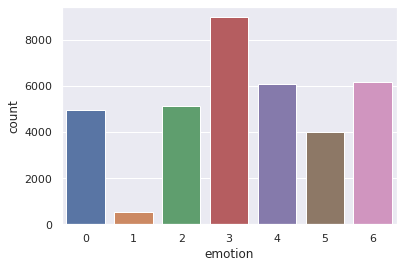

In [5]:
x_data = data['pixels']
y_data = data['emotion']
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [6]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [7]:
y_data.value_counts()

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [8]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    250 251 251 248 255 208 155 157 153 149 142 13...
62919    4 30 64 75 95 95 107 116 118 116 120 123 125 1...
62920    0 0 0 0 0 0 0 0 1 0 33 171 213 169 139 158 180...
62921    133 83 92 99 121 144 148 142 139 131 135 139 1...
62922    226 174 130 119 120 124 142 147 136 162 171 17...
Length: 62923, dtype: object

In [9]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255
x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [10]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [11]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

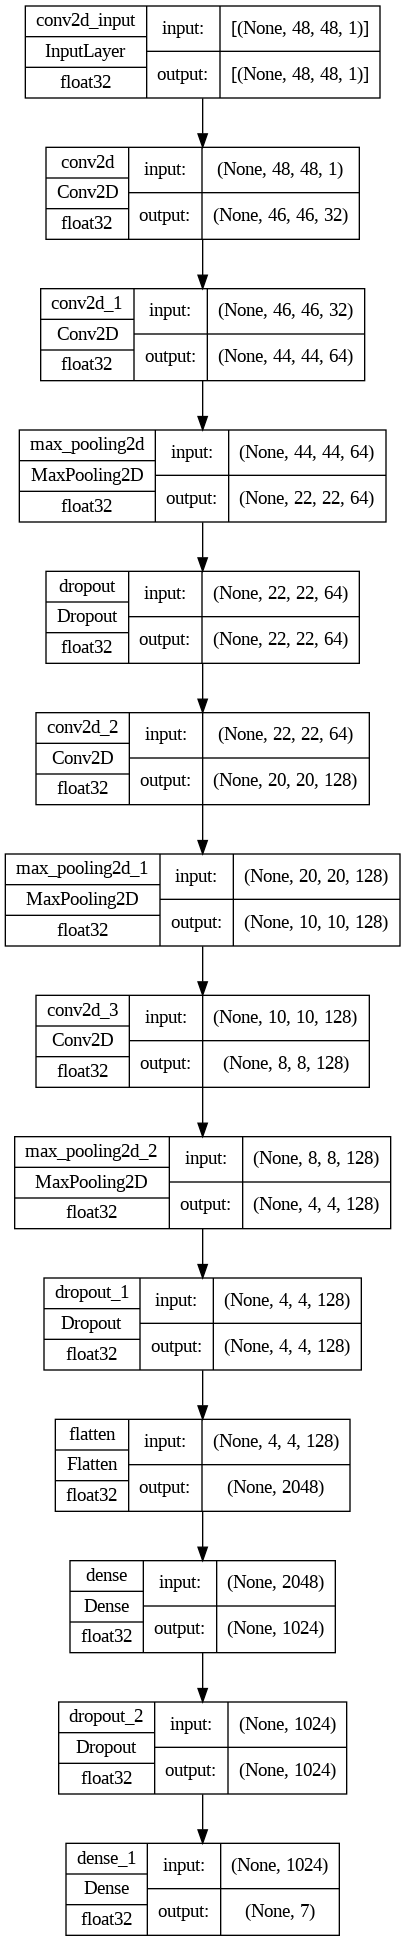

In [16]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [19]:
adam = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
y_train = np_utils.to_categorical(y_train, 7)
y_train.shape

(56630, 7)

In [23]:
y_test = np_utils.to_categorical(y_test, 7)
y_test.shape

(6293, 7)

In [24]:
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test))

Epoch 1/100
1770/1770 [==============================] - 30s 11ms/step - loss: 1.7044 - accuracy: 0.3264 - val_loss: 1.4179 - val_accuracy: 0.4731
Epoch 2/100
1770/1770 [==============================] - 20s 11ms/step - loss: 1.3335 - accuracy: 0.4998 - val_loss: 1.1615 - val_accuracy: 0.5617
Epoch 3/100
1770/1770 [==============================] - 19s 11ms/step - loss: 1.1266 - accuracy: 0.5766 - val_loss: 1.0249 - val_accuracy: 0.6181
Epoch 4/100
1770/1770 [==============================] - 19s 11ms/step - loss: 1.0010 - accuracy: 0.6254 - val_loss: 0.9270 - val_accuracy: 0.6579
Epoch 5/100
1770/1770 [==============================] - 19s 11ms/step - loss: 0.9019 - accuracy: 0.6634 - val_loss: 0.8606 - val_accuracy: 0.6871
Epoch 6/100
1770/1770 [==============================] - 19s 11ms/step - loss: 0.8203 - accuracy: 0.6968 - val_loss: 0.8175 - val_accuracy: 0.7052
Epoch 7/100
1770/1770 [==============================] - 19s 11ms/step - loss: 0.7439 - accuracy: 0.7287 - val_loss: 0

In [25]:
model.save('/content/gdrive/MyDrive/CV_Dataset/trained_model.h5')

In [26]:
print("Accuracy of our model on validation data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

197/197 [==============================] - 1s 4ms/step - loss: 0.6139 - accuracy: 0.8611
Accuracy of our model on validation data :  86.11155152320862 %


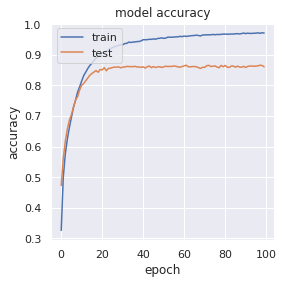

In [29]:
cm = plt.figure(figsize = (4,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
cm.savefig("model_acc")
plt.show()

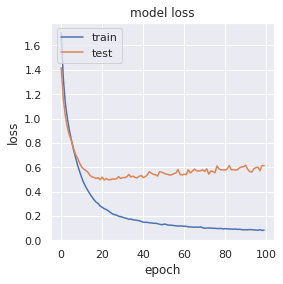

In [30]:
# summarize history for loss
cm = plt.figure(figsize = (4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
cm.savefig("model_loss")
plt.show()

In [31]:
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

197/197 [==============================] - 1s 3ms/step


[6, 5, 5, 6, 1, 0, 6, 4, 1, 3]

In [32]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [33]:
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       935
           1       1.00      1.00      1.00       895
           2       0.84      0.85      0.84       880
           3       0.85      0.83      0.84       906
           4       0.75      0.76      0.76       888
           5       0.95      0.96      0.95       869
           6       0.81      0.77      0.79       920

    accuracy                           0.86      6293
   macro avg       0.86      0.86      0.86      6293
weighted avg       0.86      0.86      0.86      6293



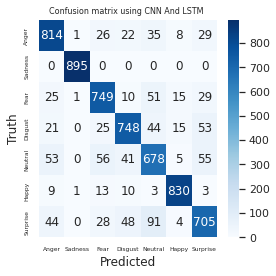

In [36]:
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (4,4))
ax = plt.axes()
sn.heatmap(cm,cmap="Blues", annot = True, fmt = 'd')
ax.xaxis.set_ticklabels([  "Anger", "Sadness", "Fear", "Disgust", "Neutral","Happy","Surprise"], fontsize=6);
ax.yaxis.set_ticklabels([  "Anger", "Sadness", "Fear", "Disgust", "Neutral","Happy","Surprise"],  fontsize=6);

plt.title('Confusion matrix using CNN And LSTM ', fontsize = 8, fontweight=500)
plt.xlabel('Predicted')
plt.ylabel('Truth')


plt.savefig("confusion")

In [ ]:
def overlay(image, filter_img, face_landmarks, face_part, INDEXES, display=True):
    '''
    This function will overlay a filter image over a face part of a person in the image/frame.
    Args:
        image:          The image of a person on which the filter image will be overlayed.
        filter_img:     The filter image that is needed to be overlayed on the image of the person.
        face_landmarks: The facial landmarks of the person in the image.
        face_part:      The name of the face part on which the filter image will be overlayed.
        INDEXES:        The indexes of landmarks of the face part.
        display:        A boolean value that is if set to true the function displays 
                        the annotated image and returns nothing.
    Returns:
        annotated_image: The image with the overlayed filter on the top of the specified face part.
    '''
    
    # Create a copy of the image to overlay filter image on.
    annotated_image = image.copy()
    
    # Errors can come when it resizes the filter image to a too small or a too large size .
    # So use a try block to avoid application crashing.
    try:
    
        # Get the width and height of filter image.
        filter_img_height, filter_img_width, _  = filter_img.shape
 
        # Get the height of the face part on which we will overlay the filter image.
        _, face_part_height, landmarks = getSize(image, face_landmarks, INDEXES)
        
        # Specify the height to which the filter image is required to be resized.
        required_height = int(face_part_height*2.5)
        
        # Resize the filter image to the required height, while keeping the aspect ratio constant. 
        resized_filter_img = cv2.resize(filter_img, (int(filter_img_width*
                                                         (required_height/filter_img_height)),
                                                     required_height))
        
        # Get the new width and height of filter image.
        filter_img_height, filter_img_width, _  = resized_filter_img.shape
 
        # Convert the image to grayscale and apply the threshold to get the mask image.
        _, filter_img_mask = cv2.threshold(cv2.cvtColor(resized_filter_img, cv2.COLOR_BGR2GRAY),
                                           25, 255, cv2.THRESH_BINARY_INV)
 
        # Calculate the center of the face part.
        center = landmarks.mean(axis=0).astype("int")
 
        # Check if the face part is mouth.
        if face_part == 'MOUTH':
 
            # Calculate the location where the smoke filter will be placed.  
            location = (int(center[0] - filter_img_width / 3), int(center[1]))
 
        # Otherwise if the face part is an eye.
        else:
 
            # Calculate the location where the eye filter image will be placed.  
            location = (int(center[0]-filter_img_width/2), int(center[1]-filter_img_height/2))
 
        # Retrieve the region of interest from the image where the filter image will be placed.
        ROI = image[location[1]: location[1] + filter_img_height,
                    location[0]: location[0] + filter_img_width]
 
        # Perform Bitwise-AND operation. This will set the pixel values of the region where,
        # filter image will be placed to zero.
        resultant_image = cv2.bitwise_and(ROI, ROI, mask=filter_img_mask)
 
        # Add the resultant image and the resized filter image.
        # This will update the pixel values of the resultant image at the indexes where 
        # pixel values are zero, to the pixel values of the filter image.
        resultant_image = cv2.add(resultant_image, resized_filter_img)
 
        # Update the image's region of interest with resultant image.
        annotated_image[location[1]: location[1] + filter_img_height,
                        location[0]: location[0] + filter_img_width] = resultant_image
            
    # Catch and handle the error(s).
    except Exception as e:
        pass
    
    # Check if the annotated image is specified to be displayed.
    if display:
 
        # Display the annotated image.
        plt.figure(figsize=[10,10])
        plt.imshow(annotated_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
            
        # Return the annotated image.
        return annotated_image

In [38]:
# Load the pre-trained emotion detection model's weight
model.load_weights('/content/gdrive/MyDrive/CV_Dataset/trained_model.h5')

# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

# dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    
    # Load the pre-trained face detection cascade classifier
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    # Load the pre-trained eye detection cascade classifier
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
#     nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')  
    
#     if nose_cascade.empty():
#       raise IOError('Unable to load the nose cascade classifier xml file')
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame    
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
    eyes = eye_cascade.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
#     nose = nose_cascade.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
    
    # Process each face detected
    for (x, y, w, h) in faces:
        # Draw a bounding box around the face
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)

        # Extract the face region from the grayscale frame
        roi_gray = gray[y:y + h, x:x + w]
        
        for (xe,ye,we,he) in eyes:
            cv2.rectangle(frame, (xe, ye-5), (xe+we, ye+he+5), (255, 0, 0), 1)

#         nose = nose_cascade.detectMultiScale(roi_gray)
        
#         for (ex,ey,ew,eh) in nose:
#             cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh))
#         for (xe,ye,we,he) in nose:
#             cv2.rectangle(frame, (xe, ye-5), (xe+we, ye+he+5), (255, 0, 0), 1)
            
#         print(faces)
#         print(eyes)

        # Resize the face region to 48x48 pixels (the input size of the emotion detection model)
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)

        # Make a prediction using the emotion detection model
        prediction = model.predict(cropped_img)

        # Get the index of the predicted emotion label
        maxindex = int(np.argmax(prediction))
        
        # Put the predicted emotion label above the bounding box
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
#         cv2.putText(frame, "eyes", (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
#         cv2.putText(frame,"eyes",(eyes[0],eyes[1]),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    # Display the processed frame with the emotion detection overlay
    cv2.imshow('Video', cv2.resize(frame,(1080,720),interpolation = cv2.INTER_CUBIC))
    
    # Exit the program if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the resources used by the webcam and close the window

cap.release()
cv2.destroyAllWindows()